# Технологии анализа данных на Python

Импортируем датасет

In [ ]:
!wget "https://drive.google.com/u/0/uc?id=1mpuQWoBEVsAYL7JIMvkAHkdaKtLOz_b2&export=download" -O mumbai_houses_task.csv

--2023-04-23 09:37:46--  https://drive.google.com/u/0/uc?id=1mpuQWoBEVsAYL7JIMvkAHkdaKtLOz_b2&export=download
Resolving drive.google.com (drive.google.com)... 142.251.163.139, 142.251.163.113, 142.251.163.101, ...
Connecting to drive.google.com (drive.google.com)|142.251.163.139|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://drive.google.com/uc?id=1mpuQWoBEVsAYL7JIMvkAHkdaKtLOz_b2&export=download [following]
--2023-04-23 09:37:46--  https://drive.google.com/uc?id=1mpuQWoBEVsAYL7JIMvkAHkdaKtLOz_b2&export=download
Reusing existing connection to drive.google.com:443.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-10-90-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/8q8i1f2gcjjt5tgu2fb5hc08sc89fsjg/1682242650000/06789500609444976556/*/1mpuQWoBEVsAYL7JIMvkAHkdaKtLOz_b2?e=download&uuid=f23dd83a-d115-4c3b-817a-261a26990cdf [following]
--2023-04-23 09:37:47--  https://doc-10-90-docs.googleuserconten

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("mumbai_houses_task.csv")
df

,price,area,latitude,longitude,Bedrooms,Bathrooms,Balcony,Status,neworold,parking,Furnished_status,Lift,type_of_building
0,22400000.0,629.0,19.032800,72.896357,2.0,2.0,0.0,Under Construction,New Property,0.0,NaN,0.0,Flat
1,35000000.0,974.0,19.032800,72.896357,3.0,2.0,0.0,Under Construction,New Property,0.0,NaN,0.0,Flat
2,31700000.0,968.0,19.085600,72.909277,3.0,3.0,0.0,Under Construction,New Property,0.0,NaN,0.0,Flat
3,18700000.0,629.0,19.155756,72.846862,2.0,2.0,2.0,Ready to Move,New Property,2.0,NaN,2.0,Flat
4,13500000.0,1090.0,19.177555,72.849887,2.0,2.0,0.0,NaN,New Property,0.0,Unfurnished,0.0,Flat
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6250,19500000.0,810.0,19.138320,72.810020,2.0,2.0,0.0,Ready to Move,Resale,0.0,Semi-Furnished,0.0,Flat
6251,22000000.0,1400.0,19.221920,72.854250,3.0,3.0,1.0,Ready to Move,Resale,1.0,Unfurnished,1.0,Flat
6252,20000000.0,750.0,19.144320,72.824111,2.0,2.0,0.0,Ready to Move,Resale,0.0,NaN,0.0,Flat
6253,11000000.0,700.0,19.047201,72.872225,2.0,2.0,0.0,Ready to Move,Resale,0.0,Furnished,0.0,Flat


## Анализ датасета

Посмотрим информацию о датасете

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6255 entries, 0 to 6254
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             6255 non-null   float64
 1   area              6255 non-null   float64
 2   latitude          6255 non-null   float64
 3   longitude         6255 non-null   float64
 4   Bedrooms          6255 non-null   float64
 5   Bathrooms         6255 non-null   float64
 6   Balcony           6255 non-null   float64
 7   Status            5774 non-null   object 
 8   neworold          6255 non-null   object 
 9   parking           6255 non-null   float64
 10  Furnished_status  3600 non-null   object 
 11  Lift              6255 non-null   float64
 12  type_of_building  6255 non-null   object 
dtypes: float64(9), object(4)
memory usage: 635.4+ KB


Построим описательную статистику датасета

In [ ]:
df.describe()

,price,area,latitude,longitude,Bedrooms,Bathrooms,Balcony,parking,Lift
count,6.255000e+03,6255.000000,6255.000000,6255.000000,6255.000000,6255.000000,6255.000000,6255.000000,6255.000000
mean,2.684187e+07,1185.625260,19.156772,72.868642,2.452278,2.425580,0.821583,0.821583,0.821583
std,2.788831e+07,636.973259,0.109447,0.058614,0.749534,0.762604,1.291957,1.291957,1.291957
min,1.500000e+06,503.000000,18.873713,72.754080,2.000000,0.000000,0.000000,0.000000,0.000000
25%,1.300000e+07,846.500000,19.081509,72.832930,2.000000,2.000000,0.000000,0.000000,0.000000
50%,1.900000e+07,1000.000000,19.147269,72.858019,2.000000,2.000000,0.000000,0.000000,0.000000
75%,3.000000e+07,1300.000000,19.213054,72.884691,3.000000,3.000000,1.000000,1.000000,1.000000
max,3.600000e+08,8000.000000,19.476239,73.197823,10.000000,10.000000,8.000000,8.000000,8.000000


Посмотрим на распределение данных

<Axes: >

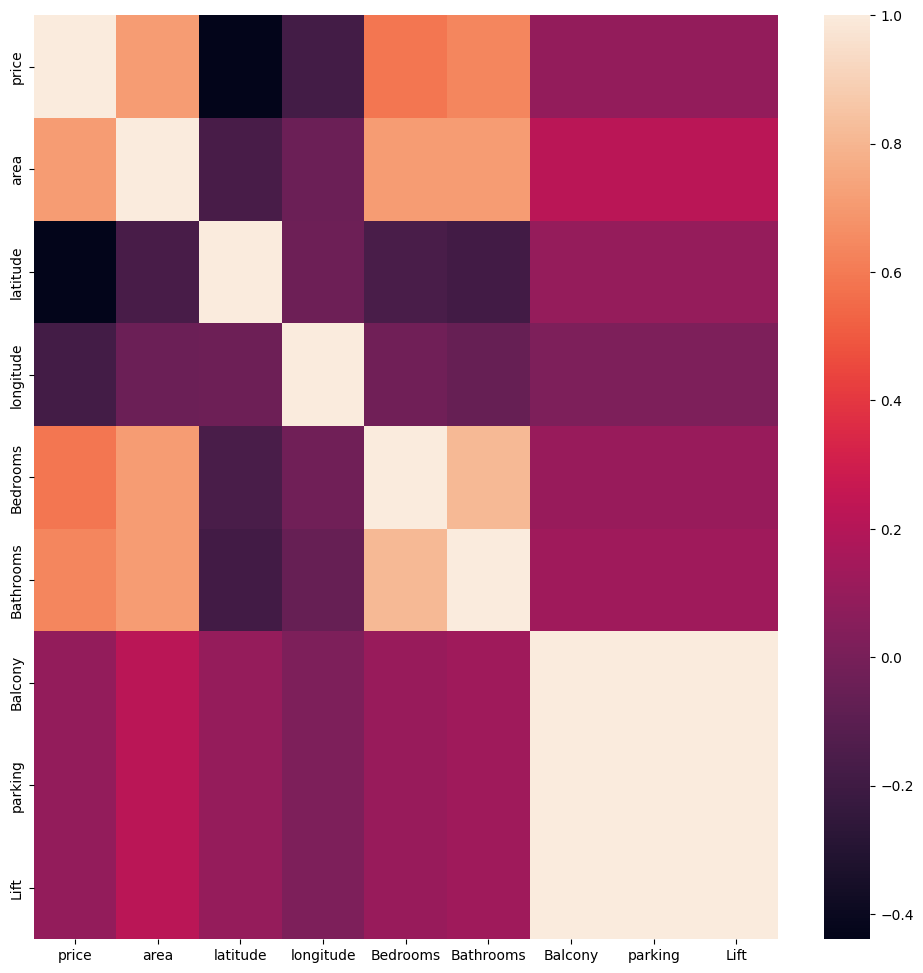

In [ ]:
numeric_cols = ["price",
"area",
"latitude",
"longitude",
"Bedrooms",
"Bathrooms",
"Balcony",
"parking",
"Lift"
]
df_numeric = df[numeric_cols].dropna()

ax, fig = plt.subplots(figsize=[12,12])
sns.heatmap(df_numeric.corr())

Видим прямую корелляцию между признаками Balcony, parking, Lift  
Имеем право удалить два из них для экономии ресурсов в дальнейшем 

In [ ]:
df = df.drop(columns=['Balcony', 'Lift'])

Построим графики зависимостей цены от признаков Bedrooms, Bathrooms, Area

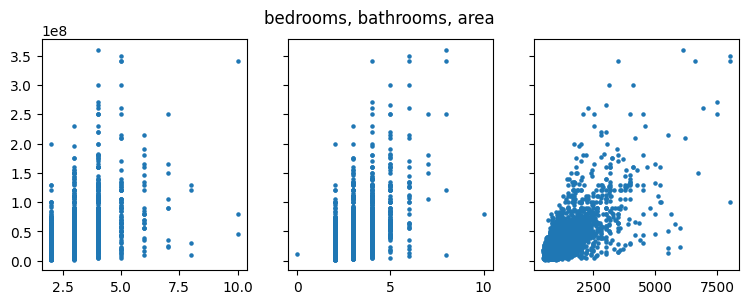

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(9, 3), sharey=True)
axs[0].scatter(df['Bedrooms'], df["price"], s = 5)
axs[1].scatter(df['Bathrooms'], df["price"], s = 5)
axs[2].scatter(df['area'], df["price"], s = 5)


fig.suptitle('bedrooms, bathrooms, area')
plt.show()

Посмотрим на количество пропусков в данных

In [ ]:
df.isna().sum()

price                  0
area                   0
latitude               0
longitude              0
Bedrooms               0
Bathrooms              0
Status               481
neworold               0
parking                0
Furnished_status    2655
type_of_building       0
dtype: int64

Пропуски данных присутствуют в двух категориальных столбцах -- Status, Furnished_status  
Заполним их модой



In [ ]:
df['Status'] = df['Status'].fillna(df['Status'].mode()[0])
df['Furnished_status'] = df['Furnished_status'].fillna(df['Furnished_status'].mode()[0])
print('Количество пропусков: ', df.isna().sum(), sep = '\n')

Количество пропусков: 
price               0
area                0
latitude            0
longitude           0
Bedrooms            0
Bathrooms           0
Status              0
neworold            0
parking             0
Furnished_status    0
type_of_building    0
dtype: int64


In [ ]:
print(df.Status.unique())
print(df.Furnished_status.unique())
print(df.neworold.unique())
print(df.type_of_building.unique())


['Under Construction' 'Ready to Move']
['Unfurnished' 'Semi-Furnished' 'Furnished']
['New Property' 'Resale']
['Flat' 'Individual House']


Эти признаки не могут быть интерпретированы как булевые, поэтому  
приводить категориальные признаки к числовым будем с помощью one-hot кодирования.

In [ ]:
df = pd.get_dummies(df)

Предобработка завершена. Убедимся в этом.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6255 entries, 0 to 6254
Data columns (total 16 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   price                              6255 non-null   float64
 1   area                               6255 non-null   float64
 2   latitude                           6255 non-null   float64
 3   longitude                          6255 non-null   float64
 4   Bedrooms                           6255 non-null   float64
 5   Bathrooms                          6255 non-null   float64
 6   parking                            6255 non-null   float64
 7   Status_Ready to Move               6255 non-null   uint8  
 8   Status_Under Construction          6255 non-null   uint8  
 9   neworold_New Property              6255 non-null   uint8  
 10  neworold_Resale                    6255 non-null   uint8  
 11  Furnished_status_Furnished         6255 non-null   uint8

Сохранение датасета

In [ ]:
df.to_csv("df_preprocessed.csv", encoding="utf-8", sep=';', index=False)
df.to_csv("/content/drive/MyDrive/df_preprocessed.csv", encoding="utf-8", sep=';', index=False)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV

In [ ]:
y = df['price']
X = df.drop(['price'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X

,area,latitude,longitude,Bedrooms,Bathrooms,parking,Status_Ready to Move,Status_Under Construction,neworold_New Property,neworold_Resale,Furnished_status_Furnished,Furnished_status_Semi-Furnished,Furnished_status_Unfurnished,type_of_building_Flat,type_of_building_Individual House
0,629.0,19.032800,72.896357,2.0,2.0,0.0,0,1,1,0,0,0,1,1,0
1,974.0,19.032800,72.896357,3.0,2.0,0.0,0,1,1,0,0,0,1,1,0
2,968.0,19.085600,72.909277,3.0,3.0,0.0,0,1,1,0,0,0,1,1,0
3,629.0,19.155756,72.846862,2.0,2.0,2.0,1,0,1,0,0,0,1,1,0
4,1090.0,19.177555,72.849887,2.0,2.0,0.0,1,0,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6250,810.0,19.138320,72.810020,2.0,2.0,0.0,1,0,0,1,0,1,0,1,0
6251,1400.0,19.221920,72.854250,3.0,3.0,1.0,1,0,0,1,0,0,1,1,0
6252,750.0,19.144320,72.824111,2.0,2.0,0.0,1,0,0,1,0,0,1,1,0
6253,700.0,19.047201,72.872225,2.0,2.0,0.0,1,0,0,1,1,0,0,1,0


# Линейная регрессия с использованием регуляризаторов Ridge, Lasso

In [ ]:
ridge = Ridge().fit(X_train, y_train)
print(ridge.score(X_test, y_test))
print(mean_absolute_error(y_test, ridge.predict(X_test)))
print(mean_squared_error(y_test, ridge.predict(X_test)))

0.6586805114689581
9302659.078079736
302138088693240.94


In [ ]:
lasso = Lasso().fit(X_train, y_train)
print(lasso.score(X_test, y_test))
print(mean_absolute_error(y_test, lasso.predict(X_test)))
print(mean_squared_error(y_test, lasso.predict(X_test)))

0.6596141094081152
9329651.80261025
301311662115142.94


Подберем гиперпараметр

In [ ]:
parameters = {'alpha': [0.25, 0.5, 0.75, 1]}
ridge_optimal = GridSearchCV(Ridge(), parameters).fit(X_train, y_train)
ridge_optimal.best_params_


{'alpha': 0.25}

In [ ]:
print(ridge_optimal.score(X_test, y_test))
print(mean_absolute_error(y_test, ridge_optimal.predict(X_test)))
print(mean_squared_error(y_test, ridge_optimal.predict(X_test)))

0.6593880506192229
9322480.357604463
301511770730980.1


In [ ]:
parameters = {'alpha': [0.25, 0.5, 0.75, 1]}
lasso_optimal = GridSearchCV(Lasso(), parameters).fit(X_train, y_train)
lasso_optimal.best_params_

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.181e+16, tolerance: 3.003e+14
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.181e+16, tolerance: 3.003e+14
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.181e+16, tolerance: 3.003e+14

{'alpha': 1}

In [ ]:
print(lasso_optimal.score(X_test, y_test))
print(mean_absolute_error(y_test, lasso_optimal.predict(X_test)))
print(mean_squared_error(y_test, lasso_optimal.predict(X_test)))

0.6596141094081152
9329651.80261025
301311662115142.94


# Деревья принятия решений

In [ ]:
dt = DecisionTreeRegressor().fit(X_train, y_train)
print(dt.score(X_test, y_test))
print(mean_absolute_error(y_test, dt.predict(X_test)))
print(mean_squared_error(y_test, dt.predict(X_test)))

0.6658660887429011
8651909.938715693
295777371955235.8


Подберем гиперпараметры

In [ ]:
parameters = {'max_features': [5, 10, 15, 20, 25, 30, 35, 40],
              'max_depth': [1, 2, 3, 4,  5, 6,  7, 8, 9, 10, 11, 12, 13, 14, 15]}

dt_optimal = GridSearchCV(DecisionTreeRegressor(), parameters).fit(X_train, y_train)
dt_optimal.best_params_

{'max_depth': 7, 'max_features': 15}

In [ ]:
print(dt_optimal.score(X_test, y_test))
print(mean_absolute_error(y_test, dt_optimal.predict(X_test)))
print(mean_squared_error(y_test, dt_optimal.predict(X_test)))

0.7244956180963138
7482406.207489828
243878155722192.38


# Бэггинг и бустинг

In [ ]:
bag = BaggingRegressor().fit(X_train, y_train)
print(bag.score(X_test, y_test))
print(mean_absolute_error(y_test, bag.predict(X_test)))
print(mean_squared_error(y_test, bag.predict(X_test)))

0.7864674424252904
6806886.4622587655
189020319633857.2


In [ ]:
gb = GradientBoostingRegressor().fit(X_train, y_train)
print(gb.score(X_test, y_test))
print(mean_absolute_error(y_test, gb.predict(X_test)))
print(mean_squared_error(y_test, gb.predict(X_test)))

0.8001087057506077
6713195.263442401
176944990310557.4


Подберем гиперпараметры

In [ ]:
parameters = {'n_estimators': [5, 10, 15, 20, 25, 30, 35, 40],
              'random_state': [1, 2, 3, 4]}
bag_optimal = GridSearchCV(BaggingRegressor(), parameters).fit(X_train, y_train)
bag_optimal.best_params_

{'n_estimators': 40, 'random_state': 3}

In [ ]:
print(bag_optimal.score(X_test, y_test))
print(mean_absolute_error(y_test, bag_optimal.predict(X_test)))
print(mean_squared_error(y_test, bag_optimal.predict(X_test)))

0.8100019626937403
6478844.425570655
168187419049057.75


In [ ]:
parameters = {'n_estimators': [ 75, 100, 200]}
gb_optimal = GridSearchCV(GradientBoostingRegressor(), parameters).fit(X_train, y_train)
gb_optimal.best_params_

{'n_estimators': 200}

In [ ]:
print(gb_optimal.score(X_test, y_test))
print(mean_absolute_error(y_test, gb_optimal.predict(X_test)))
print(mean_squared_error(y_test, gb_optimal.predict(X_test)))

0.8066989371409141
6579574.983775995
171111277372328.0


# Полносвязная нейронная сеть

In [ ]:
X_regression_train, X_regression_test, y_regression_train, y_regression_test = train_test_split(X, y, test_size=0.2)

In [ ]:
import tensorflow as tf
import numpy as np

In [ ]:
model_regression = tf.keras.Sequential(
    [
        # Dense - полносвязный слой (каждый нейрон следующего слоя связан со всеми нейронами предыдущего)
        tf.keras.layers.Dense(64, activation="relu", input_shape=(15,)),
        # на втором скрытом слое будет 32 нейрона
        tf.keras.layers.Dense(32, activation="linear"),
        # Dropout позволяет внести фактор случайности - при обучении часть нейронов будет отключаться
        # каждый нейрон, в данном случае, будет отключаться с вероятностью 0.1
        tf.keras.layers.Dropout(0.1),
        tf.keras.layers.Dense(16, activation="relu"),
        tf.keras.layers.Dropout(0.1),
        # на выходе один нейрон
        tf.keras.layers.Dense(1, activation="linear"),
    ]
)

In [ ]:
model_regression.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1024      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 3,649
Trainable params: 3,649
Non-trainabl

In [ ]:
model_regression.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.005), loss="mse")

In [ ]:
model_regression.fit(X_regression_train, y_regression_train, epochs=10, verbose=None)

In [ ]:
print(mean_absolute_error(y_regression_test, model_regression.predict(X_regression_test, verbose=None)))
print(mean_squared_error(y_regression_test, model_regression.predict(X_regression_test, verbose=None)))
print(r2_score(y_regression_test, model_regression.predict(X_regression_test, verbose=None)))


10666188.129496403
293907211185563.75
0.5142008147286442


In [ ]:
model_regression = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(64, activation="relu", input_shape=(15,)),
        tf.keras.layers.Dense(128, activation="linear"),
        tf.keras.layers.Dropout(0.05),
        tf.keras.layers.Dense(256, activation="relu"),
        tf.keras.layers.Dropout(0.025),
        tf.keras.layers.Dense(128, activation="linear"),
        tf.keras.layers.Dropout(0.05),
        tf.keras.layers.Dense(64, activation="relu"),
        tf.keras.layers.Dense(32, activation="linear"),
        # на выходе один нейрон
        tf.keras.layers.Dense(1, activation="linear"),
    ]
)
model_regression.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss="mse")
model_regression.fit(X_regression_train, y_regression_train, epochs=100, verbose=None)
print(mean_absolute_error(y_regression_test, model_regression.predict(X_regression_test, verbose=None)))
print(mean_squared_error(y_regression_test, model_regression.predict(X_regression_test, verbose=None)))
print(r2_score(y_regression_test, model_regression.predict(X_regression_test, verbose=None)))


9705805.122302158
267941306176590.88
0.5571198552221018


# Лучшей моделью оказался бустинг 🥇

# Инференс

Ссылка на приложение: https://seoulblades-inf-app-hakxth.streamlit.app/

In [ ]:
import pickle
from google.colab import drive
# путь к корню Google Диска будет '/content/drive/MyDrive'
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pickle.dump(gb, open('/content/drive/MyDrive/gradient_boosting.sav', 'wb'))

In [ ]:
gb_restored = pickle.load(open('/content/drive/MyDrive/gradient_boosting.sav', 'rb'))

In [ ]:
!pip install -q numpy pandas scikit-learn streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 82.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 22.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 kB 18.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 67.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.0 MB/s eta 0:00:00


In [ ]:
data_path = "https://drive.google.com/file/d/1dmVWQ94ees5Cw5WGVp-Q96lhXbL--LGa/view?usp=share_link"

# путь до файла с сериализованной моделью
model_path = "https://drive.google.com/file/d/14kgNvKduYeQzQs_q9gNOXPi2Spq1ETxG/view?usp=share_link"

In [ ]:
import os


id_slice = slice(32, 65)

data_file_id = data_path[id_slice]
model_file_id = model_path[id_slice]

os.system(f"wget -q -O preprocessed_data.csv https://drive.google.com/uc?id={data_file_id}")
os.system(f"wget -q -O model.pkl https://drive.google.com/uc?id={model_file_id}")

0

In [ ]:
%%writefile app.py
import pickle

import pandas as pd
import numpy as np
import streamlit as st
from sklearn.metrics import mean_absolute_error, mean_squared_error


def main():
    model = load_model("model.pkl")
    df = load_test_data("preprocessed_data.csv")

    y = df['price']
    X = df.drop(['price'], axis = 1)
    
    page = st.sidebar.selectbox(
        "Выберите страницу",
        ["Описание задачи и данных", "Запрос к модели"]
    )

    if page == "Описание задачи и данных":
        st.title("Описание задачи и данных")
        st.write("Выберите страницу слева")

        st.header("Описание задачи")
        st.markdown("""
        Набор данных содержит информацию о домах, проданных в Мумбаи, Индия.\n
        Цель этой модели - предсказать цену дома на основе определенных параметров, доступных в наборе данных.
        """)

        st.header("Описание данных")
        st.markdown("""Предоставленные данные:\n
вещественные признаки:
* price - цена дома
* area - площадь дома
* latitude - географическая широта
* longitude - географическая долгота
* Bedrooms - количество спальных комнат
* Bathrooms - количество ванных комнат
* parking- количество парковочных мест
\n
бинарные признаки:
* Status_Ready to Move - показывает, достроен ли дом
* Status_Under Construction- показывает, находится ли дом в процессе стройки
* neworold_New Property - показывает, является ли мебелью дом новым
* neworold_Resale - показывает, что дом продает не застройщик
* Furnished_status_Furnished - показывает, что дом полностью обставлен мебелью
* Furnished_status_Semi-Furnished - показывает, что дом частично обставлен мебелью
* Furnished_status_Unfurnished - показывает, что дом не обставлен мебелью
* type_of_building_Flat - показывает, является ли жилое помещение квартирой
* type_of_building_Individual House - показывает, является ли жилое помещение домом""")

    elif page == "Запрос к модели":
        st.title("Запрос к модели")
        st.write("Выберите страницу слева")
        request = st.selectbox(
            "Выберите запрос",
            ["Сделать прогноз", "Метрики", "Первые 20 предсказанных значений"]
        )

        if request == "Метрики":
            st.header("Метрики")
            y_pred = model.predict(X)
            cr=model.score(X, y)
            mae = mean_absolute_error(y, y_pred)
            mse = mean_squared_error(y, y_pred)
            st.write("Score: ", cr)
            st.write("Mean Absolute Error: ", mae)
            st.write("Mean Squared Error: ", mse)
            
            #'Classification Report: ',cr
            #st.write(confusion_matrix(y, y_pred))
        elif request == "Первые 20 предсказанных значений":
            st.header("Первые 20 предсказанных значений")
            y_pred = model.predict(X.iloc[:20,:])
            for item in y_pred:
                st.write(f"{item:.2f}")
        elif request == "Сделать прогноз":
            st.header("Сделать прогноз")

            area = st.number_input("area", 0., 2000.)########################
            latitude = st.number_input("latitude", 0., 100.)
            longitude = st.number_input("longitude", 0., 100.)
            Bedrooms = st.number_input("Bedrooms", 0, 4)
            Bathrooms = st.number_input("Bathrooms", 0, 4)
            parking = st.number_input("parking", 0, 4)
            Status1 = st.number_input("Status_Ready to Move", 0, 1)
            Status0 = st.number_input("Status_Under Construction", 0, 1)
            neworold1 = st.number_input("neworold_New Property", 0, 1)
            neworold2 = st.number_input("neworold_Resale", 0, 1)
            fur1 = st.number_input("Furnished_status_Furnished", 0, 1)
            fur2 = st.number_input("Furnished_status_Semi-Furnished", 0, 1)
            fur3 = st.number_input("Furnished_status_Unfurnished", 0, 1)
            typ1 = st.number_input("type_of_building_Flat", 0, 1)
            typ2 = st.number_input("type_of_building_Individual House", 0, 1)
            
            

            if st.button('Предсказать'):
                data = [area,	latitude,	longitude,	Bedrooms, Bathrooms, parking, Status1, Status0, neworold1, neworold2, fur1, fur2, fur3, typ1, typ2]
                data = np.array(data).reshape((1, -1))
                pred = model.predict(data)

                st.write(pred[0])
            else:
                pass



@st.cache_data
def load_model(path_to_file):
    with open(path_to_file, 'rb') as model_file:
        model = pickle.load(model_file)
    return model


@st.cache_data
def load_test_data(path_to_file):
    df = pd.read_csv(path_to_file, sep=";")
    return df


if __name__ == "__main__":
    main()

Overwriting app.py


In [ ]:
!npm install localtunnel

npm WARN saveError ENOENT: no such file or directory, open '/content/package.json'
npm WARN enoent ENOENT: no such file or directory, open '/content/package.json'
npm WARN content No description
npm WARN content No repository field.
npm WARN content No README data
npm WARN content No license field.

+ localtunnel@2.0.2
updated 1 package and audited 36 packages in 0.68s

3 packages are looking for funding
  run `npm fund` for details

found 0 vulnerabilities



In [ ]:
!streamlit run /content/app.py &>/content/logs.txt &

In [ ]:
!npx localtunnel --port 8501

npx: installed 22 in 4.139s
your url is: https://honest-signs-chew-35-186-191-238.loca.lt


In [ ]:
dff = pd.read_csv("preprocessed_data.csv", sep=";")
dff